# Severstal: Steel Defect Detection

[https://www.kaggle.com/c/severstal-steel-defect-detection](https://www.kaggle.com/c/severstal-steel-defect-detection)

# data

In [1]:
import os

In [2]:
data_dir = "/opt/data/dataset/kaggle/steel-defect-detection"

In [3]:
train_data_dir = os.path.join(data_dir, "kaggle_steel_defect_detection_train_images")

In [4]:
test_data_dir = os.path.join(data_dir, "kaggle_steel_defect_detection_test_images")

In [5]:
train_data_csv = os.path.join(data_dir, "kaggle_steel_defect_detection_train.csv", "train.csv")

In [20]:
import pandas as pd

In [21]:
data_csv = pd.read_csv(train_data_csv)

In [29]:
data_csv.loc[892*4 + 2]["EncodedPixels"]

'192259 48 192515 188 192771 228 193027 229 193283 230 193539 230 193795 231 194051 232 194307 232 194564 232 194820 232 195076 233 195332 234 195588 234 195844 235 196100 235 196356 235 196612 234 196868 234 197124 234 197380 233 197636 232 197892 231 198148 230 198404 229 198660 228 198917 225 199173 223 199429 221 199685 219 199941 216 200204 204 200466 142 200729 73 200991 5 278071 16 278326 21 278408 66 278489 24 278580 28 278624 109 278741 34 278783 2 278835 157 278995 46 279091 206 279347 205 279603 205 279861 203 280119 201 280377 199 280635 197 280893 194 281151 192 281409 190 281667 188 281928 183 282192 150 282348 19 282456 8 282471 121 282609 13 282732 10 282754 88 282870 6 283019 74 283327 17'

In [13]:
x = data_csv.dropna()

In [20]:
list(x.index)

[0,
 18,
 20,
 27,
 30,
 46,
 47,
 51,
 56,
 57,
 63,
 70,
 78,
 90,
 94,
 119,
 122,
 134,
 136,
 137,
 142,
 148,
 149,
 154,
 160,
 166,
 176,
 177,
 182,
 186,
 202,
 206,
 210,
 218,
 236,
 240,
 248,
 254,
 258,
 259,
 262,
 266,
 270,
 278,
 282,
 286,
 292,
 296,
 302,
 307,
 310,
 312,
 327,
 330,
 338,
 342,
 347,
 350,
 358,
 366,
 370,
 374,
 375,
 388,
 394,
 406,
 410,
 414,
 422,
 426,
 431,
 434,
 446,
 454,
 458,
 465,
 470,
 490,
 498,
 502,
 506,
 520,
 530,
 538,
 540,
 546,
 558,
 567,
 570,
 594,
 598,
 618,
 622,
 626,
 642,
 650,
 656,
 662,
 670,
 678,
 682,
 695,
 698,
 699,
 702,
 710,
 734,
 736,
 742,
 743,
 754,
 762,
 765,
 770,
 782,
 786,
 794,
 800,
 806,
 807,
 814,
 818,
 820,
 834,
 854,
 870,
 874,
 882,
 886,
 890,
 898,
 911,
 914,
 928,
 935,
 946,
 950,
 958,
 966,
 970,
 974,
 979,
 982,
 986,
 994,
 998,
 1016,
 1021,
 1026,
 1030,
 1035,
 1038,
 1044,
 1050,
 1058,
 1094,
 1098,
 1106,
 1108,
 1114,
 1117,
 1121,
 1134,
 1142,
 1151,
 1154,


In [8]:
import matplotlib.pyplot as plt

In [9]:
img_file = os.path.join(train_data_dir, "0002cc93b.jpg")

In [10]:
import cv2 

In [184]:
im = cv2.imread(img_file)

In [38]:
im.shape

(256, 1600, 3)

In [15]:
def imshow(im, figsize=(40, 20)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.imshow(im)

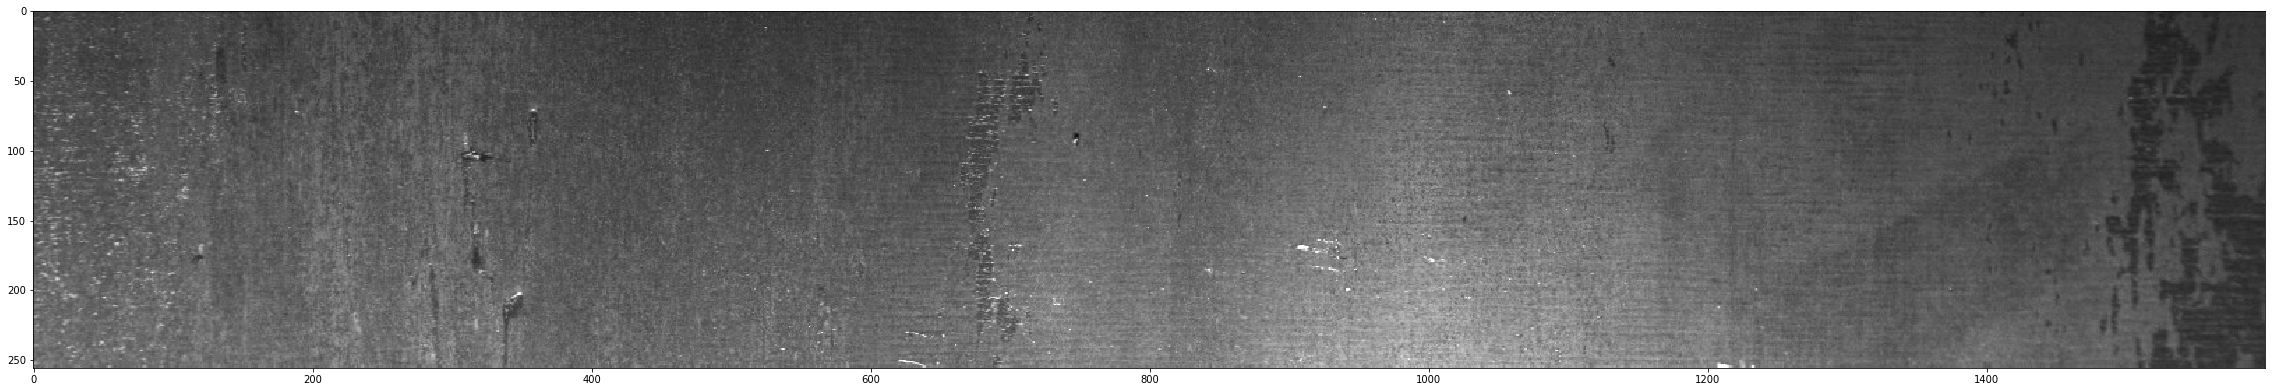

In [16]:
imshow(im)

In [18]:
type(data_csv.loc[3]["EncodedPixels"])

float

In [37]:
pixels = [int(x) for x in data_csv.loc[0]["EncodedPixels"].split()]

In [39]:
def decodePixels(h, w, encodedPixels):
    encodedPixels = [int(x) for x in encodedPixels.split()]
    decodedPixels = []
    for i in range(0, len(encodedPixels), 2):
        decodedPixels += list(range(encodedPixels[i], encodedPixels[i]+encodedPixels[i+1]))
    decodedPixels = [(pixel % h, pixel // h) for pixel in decodedPixels]
    
    return decodedPixels

In [107]:
def decodePixels_ploy(h, w, encodedPixels):
    encodedPixels = [int(x) for x in encodedPixels.split()]
    decodedPixels = []
    for i in range(0, len(encodedPixels), 2):
        decodedPixels += [encodedPixels[i],encodedPixels[i]+encodedPixels[i+1]-1]
    decodedPixels = [(pixel % h, pixel // h) for pixel in decodedPixels]
    
    return decodedPixels

In [153]:
pixels = decodePixels(im.shape[0], im.shape[1],data_csv.loc[0]["EncodedPixels"])

In [154]:
import numpy as np

In [155]:
labels = np.zeros(im.shape[0:2], dtype=np.uint8)

In [156]:
for h, w in pixels:
    labels[h,w] = 1

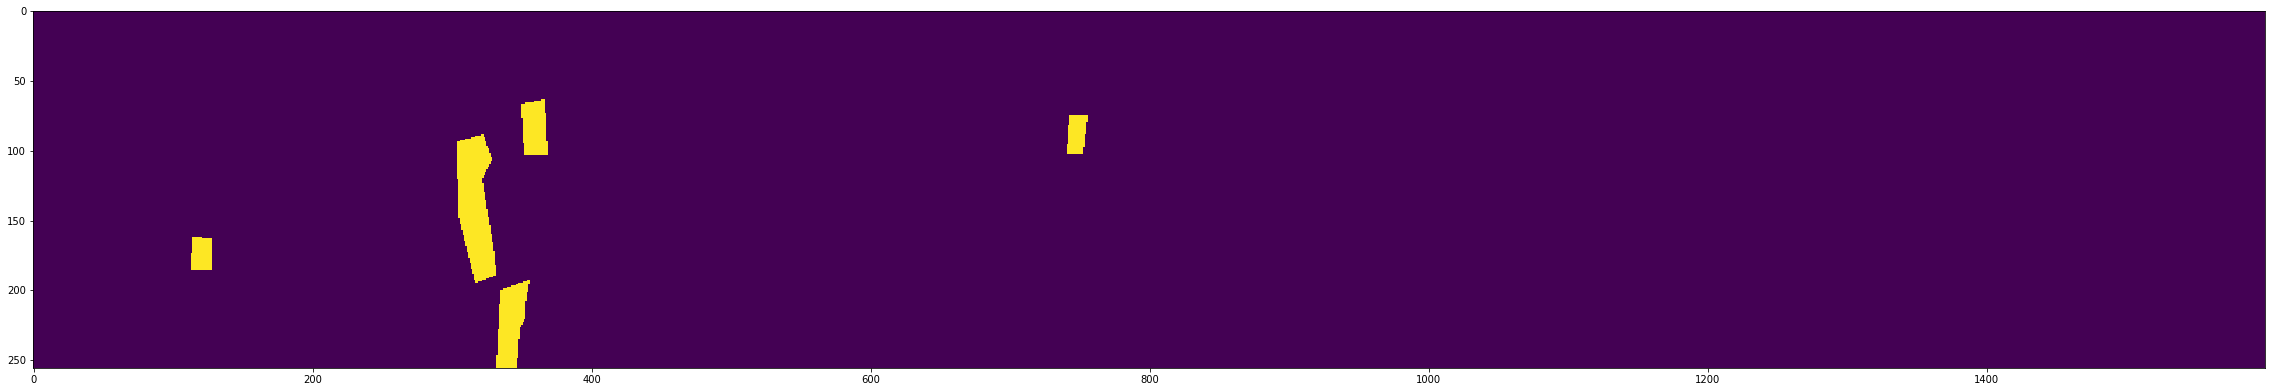

In [157]:
imshow(labels)

In [168]:
contours, hie_enginerarchy = cv2.findContours(labels,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

In [180]:
for i in range(len(contours)):
    cnt = contours[i]
    approx = cv2.approxPolyDP(cnt, 2, True)
    cv2.polylines(im, [approx], True, (0, 0, 255), 2)

In [193]:
def draw_mask(im, mask_pixels, color=(255, 0, 0)):
    contours, _ = cv2.findContours(labels,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cv2.polylines(im, [cv2.approxPolyDP(cnt, 2, True)], True, color, 1)

In [194]:
draw_mask(im, pixels)

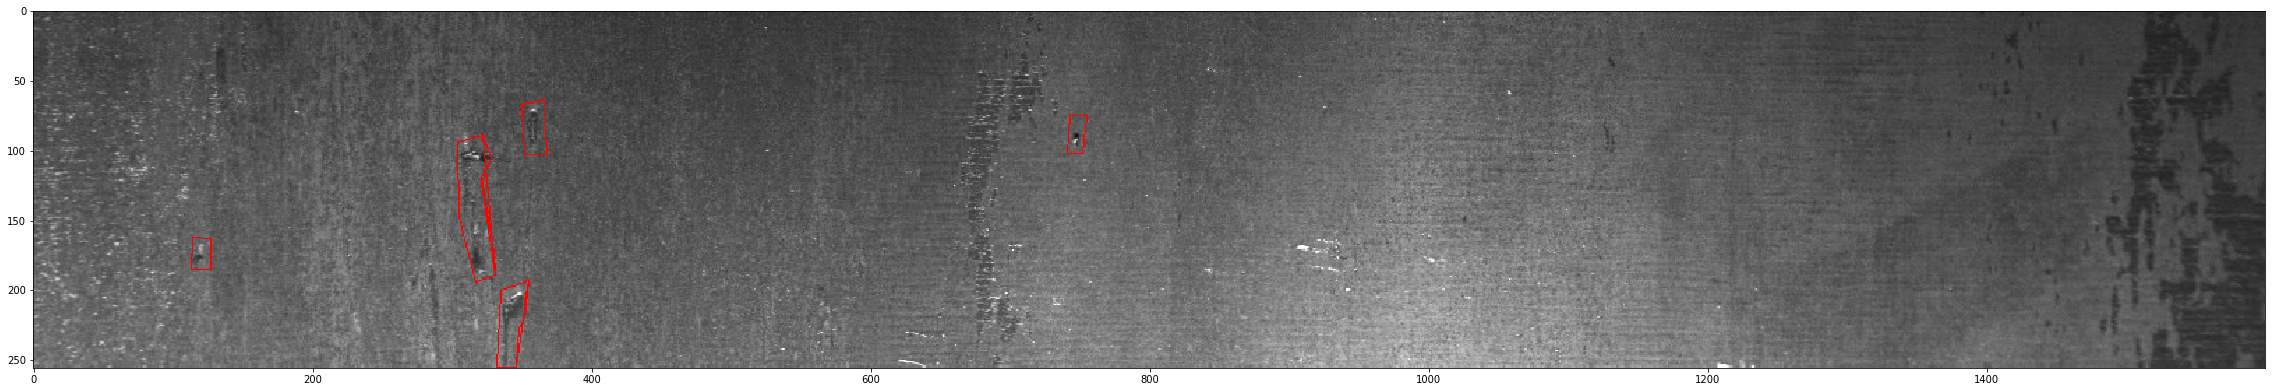

In [195]:
imshow(im)

In [6]:
cd /opt/git/cv/kaggle/Steel_Defect_Detection

/opt/git/cv/kaggle/Steel_Defect_Detection


In [7]:
from utils.tools import *

In [8]:
images = read_csv_file(train_data_csv)

In [13]:
images[list(images.keys())[2]]

[{'cls_id': 1, 'EncodedPixels': nan},
 {'cls_id': 2, 'EncodedPixels': nan},
 {'cls_id': 3, 'EncodedPixels': nan},
 {'cls_id': 4, 'EncodedPixels': nan}]

In [17]:
mask = make_mask(images[list(images.keys())[2]])

In [18]:
mask.shape

(256, 1600)

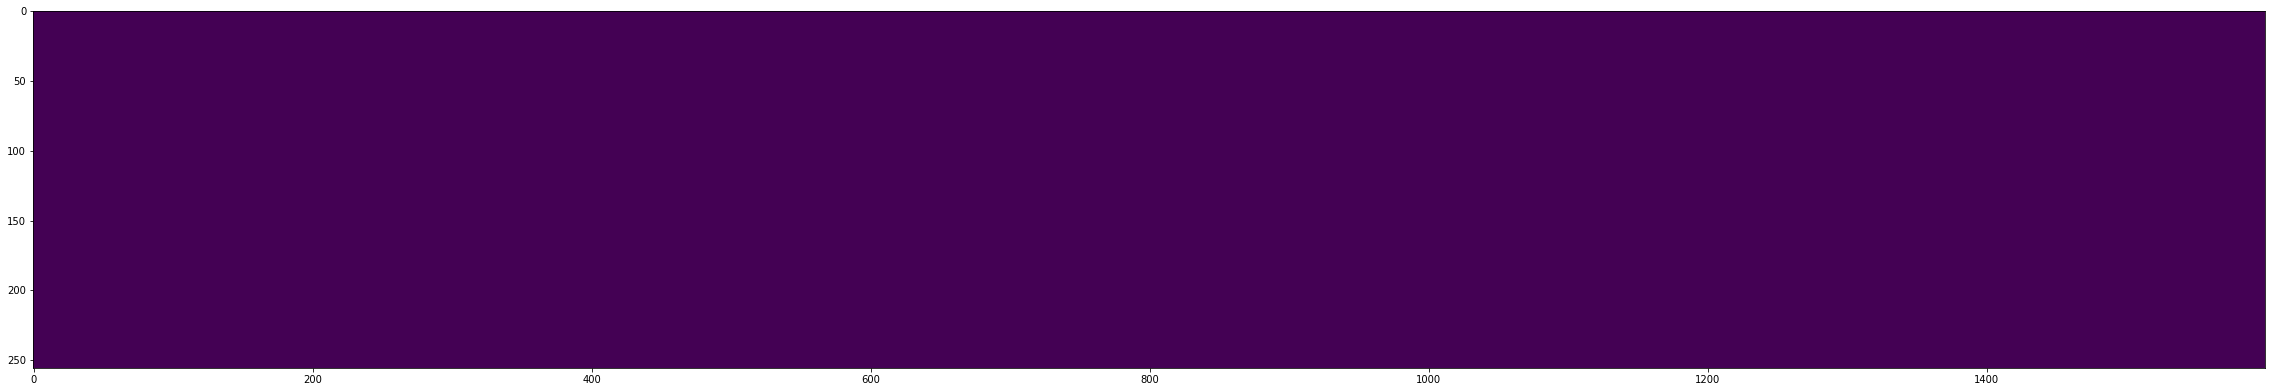

In [19]:
imshow(mask)

## 数据统计

In [1]:
import numpy as np
import pandas as pd

from utils.data import *
from utils.tools import *

In [2]:
steel_imdb = Steel_IMDB("/opt/data/dataset/kaggle/steel-defect-detection")

read csv file data


100%|██████████| 50272/50272 [00:10<00:00, 4631.84it/s]

decode mask pixels



100%|██████████| 12568/12568 [00:33<00:00, 374.63it/s]


In [3]:
steel_imdb.masks.keys()

dict_keys(['0002cc93b.jpg', '00031f466.jpg', '000418bfc.jpg', '000789191.jpg', '0007a71bf.jpg', '000a4bcdd.jpg', '000f6bf48.jpg', '0014fce06.jpg', '001982b08.jpg', '001d1b355.jpg', '001d3d093.jpg', '0025bde0c.jpg', '002af848d.jpg', '002e73b3c.jpg', '002fc4e19.jpg', '0030401a5.jpg', '003ac9d2a.jpg', '0046839bd.jpg', '005b92582.jpg', '005d86c25.jpg', '005da33cf.jpg', '005dbf0e0.jpg', '005f02e20.jpg', '005f19695.jpg', '006a4402e.jpg', '0074d81d0.jpg', '00762aa3b.jpg', '007f28bba.jpg', '008479d08.jpg', '008621629.jpg', '0088260da.jpg', '00894274f.jpg', '008b9acf5.jpg', '008d0f87b.jpg', '008ef3d74.jpg', '0095cd374.jpg', '009b12ccc.jpg', '00ac8372f.jpg', '00af2671f.jpg', '00b989e78.jpg', '00bc01bfe.jpg', '00bf8497a.jpg', '00c24a74c.jpg', '00c6060db.jpg', '00c88fed0.jpg', '00cdb56a0.jpg', '00d639396.jpg', '00d7ae946.jpg', '00dcb19f3.jpg', '00ded7837.jpg', '00e0398ad.jpg', '00ec97699.jpg', '00f1665e6.jpg', '00f68d337.jpg', '00f6e702c.jpg', '00f95222c.jpg', '00fe04c98.jpg', '00fe7f023.jpg', '01

In [38]:
samples = {0:{"images":[], "areas":[]}, 1:{"images":[], "areas":[]}, 2:{"images":[], "areas":[]}, 3:{"images":[], "areas":[]}, 4:{"images":[], "areas":[]}}

for key in steel_imdb.masks:
    sample = steel_imdb.masks[key]
    negative_sample = False
    for label in sample:
        if label["DecodedPixels"] is not None:
            negative_sample = True
            samples[label["cls_id"]]["images"].append(key)
    if not negative_sample:
        samples[0]["images"].append(key)

In [39]:
for cls_id in samples:
    samples[cls_id]["num"] = len(samples[cls_id]["images"])
    if cls_id == 0:
        continue
        
    for image in samples[cls_id]["images"]:
        samples[cls_id]["areas"].append(len(steel_imdb.masks[image][cls_id-1]["DecodedPixels"]))
        
    pass

In [41]:
samples

{0: {'images': ['00031f466.jpg',
   '000418bfc.jpg',
   '000789191.jpg',
   '001982b08.jpg',
   '001d1b355.jpg',
   '001d3d093.jpg',
   '002e73b3c.jpg',
   '003ac9d2a.jpg',
   '005b92582.jpg',
   '005da33cf.jpg',
   '005dbf0e0.jpg',
   '006a4402e.jpg',
   '0074d81d0.jpg',
   '00762aa3b.jpg',
   '007f28bba.jpg',
   '008479d08.jpg',
   '00894274f.jpg',
   '008b9acf5.jpg',
   '009b12ccc.jpg',
   '00b989e78.jpg',
   '00c24a74c.jpg',
   '00c6060db.jpg',
   '00d7ae946.jpg',
   '00dcb19f3.jpg',
   '00ded7837.jpg',
   '00f68d337.jpg',
   '00f95222c.jpg',
   '00fe04c98.jpg',
   '00fe7f023.jpg',
   '0101e2cf0.jpg',
   '012a4581b.jpg',
   '014409fcc.jpg',
   '015ed7fac.jpg',
   '017d75655.jpg',
   '0181695f9.jpg',
   '0198ab92d.jpg',
   '01b237ab8.jpg',
   '01b6c2dc1.jpg',
   '01d590c5f.jpg',
   '01d97b205.jpg',
   '01dbcd2ec.jpg',
   '01e501f99.jpg',
   '01e69cfc3.jpg',
   '0202a5f22.jpg',
   '023353d24.jpg',
   '023a21cf2.jpg',
   '02449f836.jpg',
   '026105525.jpg',
   '02709b038.jpg',
   '027

In [4]:
data_statistical

<function utils.tools.data_statistical(masks)>

In [5]:
data_statistical(steel_imdb.masks)

{0: {'images': ['00031f466.jpg',
   '000418bfc.jpg',
   '000789191.jpg',
   '001982b08.jpg',
   '001d1b355.jpg',
   '001d3d093.jpg',
   '002e73b3c.jpg',
   '003ac9d2a.jpg',
   '005b92582.jpg',
   '005da33cf.jpg',
   '005dbf0e0.jpg',
   '006a4402e.jpg',
   '0074d81d0.jpg',
   '00762aa3b.jpg',
   '007f28bba.jpg',
   '008479d08.jpg',
   '00894274f.jpg',
   '008b9acf5.jpg',
   '009b12ccc.jpg',
   '00b989e78.jpg',
   '00c24a74c.jpg',
   '00c6060db.jpg',
   '00d7ae946.jpg',
   '00dcb19f3.jpg',
   '00ded7837.jpg',
   '00f68d337.jpg',
   '00f95222c.jpg',
   '00fe04c98.jpg',
   '00fe7f023.jpg',
   '0101e2cf0.jpg',
   '012a4581b.jpg',
   '014409fcc.jpg',
   '015ed7fac.jpg',
   '017d75655.jpg',
   '0181695f9.jpg',
   '0198ab92d.jpg',
   '01b237ab8.jpg',
   '01b6c2dc1.jpg',
   '01d590c5f.jpg',
   '01d97b205.jpg',
   '01dbcd2ec.jpg',
   '01e501f99.jpg',
   '01e69cfc3.jpg',
   '0202a5f22.jpg',
   '023353d24.jpg',
   '023a21cf2.jpg',
   '02449f836.jpg',
   '026105525.jpg',
   '02709b038.jpg',
   '027